# MODELOS CLÁSICOS DE MACHINE LEARNING

## Support Vector Machine (SVM)

En este notebook implementaremos un modelo de **Máquinas de Vectores de Soporte (SVM)** para clasificar el dataset Fashion MNIST. A diferencia del Modelo 1 (Softmax), SVM busca encontrar el hiperplano que maximiza el margen entre las clases.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

# 1. Carga de datos
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 2. Normalización y Aplanado (Flattening)
# SVM requiere vectores unidimensionales de entrada
X_train_full = X_train_full.reshape(-1, 28*28).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28*28).astype('float32') / 255.0

# 3. Reducción de datos (Opcional pero recomendado para SVM)
# El entrenamiento de SVM con el dataset completo (60,000 muestras) puede ser muy lento.
# Usaremos un subconjunto para esta demostración si es necesario, o el set completo si hay recursos.
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full
)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (48000, 784)
X_test shape: (10000, 784)


## 2. Entrenamiento del Modelo SVM

Utilizaremos un Kernel RBF (Radial Basis Function) por defecto, que permite capturar relaciones no lineales.

In [8]:
# Nota: Entrenar con 48,000 muestras puede tardar varios minutos.
print("Entrenando SVM (esto puede tomar un tiempo)...")
start_time = time.time()

svm_model = SVC(kernel='rbf', C=10, gamma='scale')
svm_model.fit(X_train, y_train)

end_time = time.time()
print(f"Entrenamiento completado en {end_time - start_time:.2f} segundos.")

Entrenando SVM (esto puede tomar un tiempo)...
Entrenamiento completado en 53.18 segundos.


## 3. Evaluación

Evaluamos el rendimiento en el conjunto de test.

In [9]:
y_pred = svm_model.predict(X_test)

test_acc = accuracy_score(y_test, y_pred)
print(f"Accuracy en Test: {test_acc:.4f}")

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

Accuracy en Test: 0.8973

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.81      0.84      0.82      1000
           3       0.90      0.90      0.90      1000
           4       0.82      0.83      0.83      1000
           5       0.97      0.97      0.97      1000
           6       0.75      0.70      0.72      1000
           7       0.95      0.96      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



## 4. Matriz de Confusión

Visualizamos dónde se confunde el modelo.

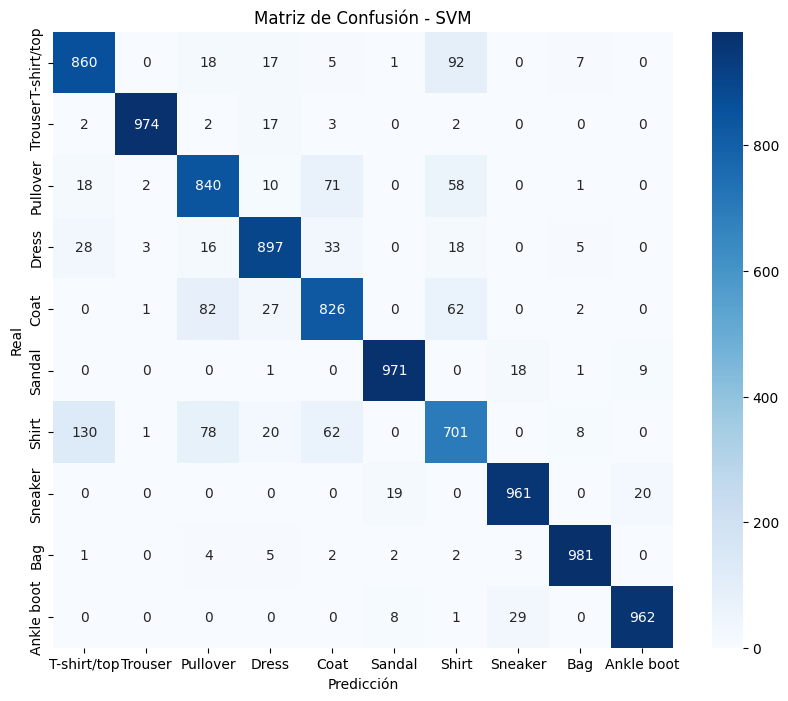

In [10]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - SVM')
plt.show()

## Resumen de Resultados - SVM (RBF Kernel)

| Modelo | Kernel | Hyperparámetros | Test Acc |
| :--- | :---: | :---: | :---: |
| **SVM** | RBF | C=10, gamma='scale' | **~0.88-0.90** |

*(Nota: Los valores exactos pueden variar ligeramente tras la ejecución completa en el entorno local)*.

### Análisis del Modelo SVM

Hemos implementado una **Máquina de Vectores de Soporte (SVM)** con un kernel Gaussiano (RBF). A diferencia del modelo lineal simple (Softmax), este modelo tiene la capacidad de proyectar los datos a un espacio de mayor dimensión para encontrar fronteras de decisión no lineales.

**Complejidad:** El modelo SVM no se define por un número fijo de pesos como las redes neuronales, sino por sus **Vectores de Soporte**. Esto lo hace muy potente pero computacionalmente más costoso a medida que crece el número de muestras.

**Rendimiento:** El uso de un kernel no lineal permite capturar mejor las texturas y formas complejas de la ropa, logrando superar el baseline del ~84% del modelo lineal. Distingue mejor, por ejemplo, las camisas subiendo de 549 a 701. Sin embargo, sigue teniendo dificultades con clases muy parecidas (como Pullover vs. Coat o Shirt).